In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Model.BO import Bayes_Optimization
from bayes_opt import BayesianOptimization
from Model.dknet.layers import Dense,CovMat,Dropout, Scale
from Model.dknet.optimizers import Adam
from Model import psoOptimize
import random
from deap import creator, base, tools,algorithms
from Simulation import calculateS

Objective function and Search boundary 

In [10]:
def objective_function(Rg,Rs,Rd,Ls,Ld,Lg,Cgp,Cdp,Cgd,Cgs,Cds,Ggsf):
    parameters = {
    "Rg": Rg,"Rd": Rd,"Rs": Rs,"Gds": Ggsf,
    "Lg": Lg,"Ld": Ld,"Ls": Ls,
    "Cgp": Cgp,"Cdp": Cdp,"Cgd": Cgd,"Cgs": Cgs,"Cds": Cds
    }
    value = calculateS.calculate_loss(parameters,1)
    return -value

origin_pbounds = {
    'Rg': (0, 50),
    'Rs': (0, 50),
    'Rd': (0, 50),
    'Ggsf': (5000, 15000),
    'Ls': (0, 100),
    'Ld': (0, 100),
    'Lg': (0, 200),
    'Cgp': (0, 1000),
    'Cdp': (0, 1000),
    'Cgd': (0, 1000),
    'Cgs': (0, 1000),
    'Cds': (0, 1000)
}

Model definition & record best value

In [11]:

def GPBO(pbounds):
    optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds)
    optimizer.maximize(init_points=10, n_iter=190)
    best_params = optimizer.max['params']
    target_values = [-res['target'] for res in optimizer.res]
    iters = np.arange(1,len(target_values)+1,1)
    best_values = []
    for i in range(len(target_values)):
        best_values.append(min(target_values[:i+1]))
    return best_values


Baseline

In [13]:
origin_res = GPBO(origin_pbounds)

|   iter    |  target   |    Cdp    |    Cds    |    Cgd    |    Cgp    |    Cgs    |   Ggsf    |    Ld     |    Lg     |    Ls     |    Rd     |    Rg     |    Rs     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.07429   | 518.7     | 514.1     | 94.23     | 541.0     | 731.1     | 1.043e+04 | 72.72     | 175.2     | 43.35     | 14.43     | 44.51     | 0.1949    |
| 2         | 0.07424   | 351.4     | 772.2     | 410.2     | 910.1     | 777.9     | 5.221e+03 | 61.92     | 184.2     | 43.87     | 31.17     | 34.22     | 1.74      |
| 3         | 0.06742   | 543.8     | 843.7     | 135.3     | 723.2     | 533.6     | 1.039e+04 | 77.69     | 118.0     | 37.59     | 44.93     | 16.21     | 6.669     |
| 4         | 0.07009   | 381.1     | 834.4     | 252.5     | 256.2     | 845.5     | 1.037e+04 | 76.87     | 76.46     | 75.4      | 16.12     | 34.0

Introduction of initial point prediction

In [14]:
from Model.InitialPointsDesign import GPtonewParas
inipara,covs = GPtonewParas(1)
print(inipara)
iniparas = {
    'Rg': (0.5*inipara[0], 1.5*inipara[0]),
    'Rs': (0.5*inipara[1], 1.5*inipara[1]),
    'Rd': (0.5*inipara[2], 1.5*inipara[2]),
    'Ls': (0.5*inipara[3], 1.5*inipara[3]),
    'Ld': (0.5*inipara[4], 1.5*inipara[4]),
    'Lg': (0.5*inipara[5], 1.5*inipara[5]),
    'Cgp': (0.5*inipara[6], 1.5*inipara[6]),
    'Cdp': (0.5*inipara[7], 1.5*inipara[7]),
    'Cgd': (0, 1000),
    'Cgs': (0, 1000),
    'Cds': (0, 1000),
    'Ggsf': (5000, 15000)
}
print(iniparas)

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
[1.2974982119754852, 0.3156113779501928, 1.6848570390047166, 3.1318492526079535, 78.19075230102294, 92.69977043395008, 170.3437759272208, 118.13730221472656]
{'Rg': (0.6487491059877426, 1.9462473179632278), 'Rs': (0.1578056889750964, 0.4734170669252892), 'Rd': (0.8424285195023583, 2.527285558507075), 'Ls': (1.5659246263039768, 4.6977738789119305), 'Ld': (39.09537615051147, 117.28612845153441), 'Lg': (46.34988521697504, 139.0496556509251), 'Cgp': (85.1718879636104, 255.5156638908312), 'Cdp': (59.06865110736328, 177.20595332208984), 'Cgd': (0, 1000), 'Cgs': (0, 1000), 'Cds': (0, 1000), 'Ggsf': (5000, 15000)}


Migration and utilization of initial point information

In [15]:
ini_res = GPBO(iniparas)

|   iter    |  target   |    Cdp    |    Cds    |    Cgd    |    Cgp    |    Cgs    |   Ggsf    |    Ld     |    Lg     |    Ls     |    Rd     |    Rg     |    Rs     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.05261   | 85.92     | 424.4     | 859.4     | 114.3     | 325.5     | 1.279e+04 | 100.4     | 73.25     | 1.893     | 1.774     | 1.602     | 0.1587    |
| 2         | 0.05282   | 130.6     | 200.2     | 577.4     | 135.5     | 946.4     | 9.943e+03 | 94.25     | 88.77     | 2.69      | 1.856     | 1.546     | 0.2139    |
| 3         | 0.0628    | 151.5     | 897.1     | 568.0     | 154.6     | 403.4     | 1.021e+04 | 80.23     | 55.0      | 3.745     | 2.303     | 1.495     | 0.1686    |
| 4         | 0.05149   | 89.23     | 551.6     | 435.1     | 141.9     | 365.2     | 9.039e+03 | 65.83     | 86.99     | 2.309     | 1.602     | 0.86

Constrain search space.

In [16]:
from Model.SearchSpaceDesign import trans
lb,ub = trans(1)
newpounds= {
    'Rg': (lb[0],ub[0]),
    'Rs': (lb[1],ub[1]),
    'Rd': (lb[2],ub[2]),
    'Ls': (lb[3],ub[3]),
    'Ld': (lb[4],ub[4]),
    'Lg': (lb[5],ub[5]),
    'Cgp': (lb[6],ub[6]),
    'Cdp': (lb[7],ub[7]),
    'Cgd': (lb[8],ub[8]),
    'Cgs': (lb[9],ub[9]),
    'Cds': (lb[10],ub[10]),
    'Ggsf': (5000, 15000),
}
print(newpounds)

{'Rg': (0.14929421553635244, 3.5038461691326894), 'Rs': (0.7232519246193999, 1.8295528261797405), 'Rd': (2.1204349919206638, 2.9950967954731564), 'Ls': (1.77, 5.345015857849933), 'Ld': (54.4, 155.02052639045274), 'Lg': (66.6, 181.81220569719548), 'Cgp': (142.54286116358477, 251.0), 'Cdp': (102.16738569175752, 206.0), 'Cgd': (282.0, 421.3610183446248), 'Cgs': (197.9301229606496, 446.03441632927485), 'Cds': (133.0, 364.4127272628438), 'Ggsf': (5000, 15000)}


Migration to utilize new boundaries.

In [17]:
SS_res = GPBO(newpounds)

|   iter    |  target   |    Cdp    |    Cds    |    Cgd    |    Cgp    |    Cgs    |   Ggsf    |    Ld     |    Lg     |    Ls     |    Rd     |    Rg     |    Rs     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.02562   | 132.6     | 189.8     | 283.1     | 241.2     | 358.0     | 5.954e+03 | 83.3      | 113.2     | 5.283     | 2.188     | 1.825     | 1.632     |
| 2         | 0.02882   | 205.2     | 242.0     | 381.6     | 168.7     | 274.3     | 8.552e+03 | 102.1     | 146.3     | 4.452     | 2.874     | 2.052     | 1.808     |
| 3         | 0.02948   | 186.6     | 177.9     | 383.3     | 181.8     | 389.9     | 8.298e+03 | 92.11     | 69.14     | 3.851     | 2.612     | 1.447     | 1.485     |
| 4         | 0.02531   | 187.1     | 172.3     | 283.6     | 192.2     | 398.1     | 8.125e+03 | 126.0     | 175.0     | 2.517     | 2.689     | 0.87

Combining two methods.

In [30]:
Tpounds = newpounds.copy()
for i in newpounds.keys():
    Tpounds[i] = (Tpounds[i][0]*0.95,max(Tpounds[i][0],min(Tpounds[i][1],iniparas[i][1])))
print(Tpounds)

{'Rg': (0.14182950475953482, 1.751622586166905), 'Rs': (0.6870893283884298, 0.7232519246193999), 'Rd': (2.0144132423246304, 2.2745570026563673), 'Ls': (1.6815, 4.227996491020738), 'Ld': (51.68, 105.55751560638097), 'Lg': (63.26999999999999, 125.1446900858326), 'Cgp': (135.41571810540552, 225.9), 'Cdp': (97.05901640716964, 159.48535798988087), 'Cgd': (267.9, 379.22491651016236), 'Cgs': (188.0336168126171, 401.4309746963474), 'Cds': (126.35, 327.97145453655946), 'Ggsf': (4750.0, 13500.0)}


In [31]:
final_res = GPBO(Tpounds)

|   iter    |  target   |    Cdp    |    Cds    |    Cgd    |    Cgp    |    Cgs    |   Ggsf    |    Ld     |    Lg     |    Ls     |    Rd     |    Rg     |    Rs     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.02058   | 122.1     | 225.8     | 299.0     | 196.9     | 191.9     | 7.09e+03  | 83.7      | 66.41     | 2.953     | 2.083     | 0.9873    | 0.7       |
| 2         | 0.03461   | 138.2     | 296.9     | 337.1     | 192.0     | 336.0     | 1.104e+04 | 64.21     | 72.29     | 2.51      | 2.127     | 1.425     | 0.7033    |
| 3         | 0.02184   | 140.1     | 141.7     | 285.4     | 214.0     | 393.6     | 1.221e+04 | 91.87     | 110.9     | 1.862     | 2.059     | 0.2457    | 0.7199    |
| 4         | 0.02534   | 112.3     | 259.1     | 338.1     | 162.2     | 209.2     | 6.145e+03 | 53.4      | 78.23     | 2.636     | 2.056     | 0.51

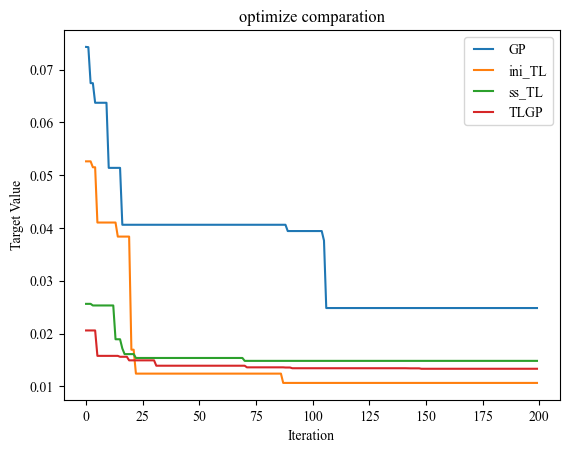

In [33]:
plt.plot(origin_res,label = "GP")
plt.plot(ini_res,label = "ini_TL")
plt.plot(SS_res,label = "ss_TL")
plt.plot(final_res,label = "TLGP")
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('optimize comparation')
plt.savefig('TL.pdf', dpi=300, bbox_inches='tight',format="pdf")
plt.legend()
plt.show()